In [359]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, accuracy_score, recall_score, make_scorer

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Loading the data

In [456]:
train = pd.read_csv(r'..\train_hr.csv')

In [457]:
test = pd.read_csv(r'..\test_hr.csv')

In [362]:
# Previewing the Train Data
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [143]:
# Previewing the Test Data
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [423]:
# Checking the number of observations and number of columns
train.shape, test.shape

((54808, 13), (23490, 12))

In [465]:
# Dropping 'employee_id' column, as it has all unique values
train.drop('employee_id', inplace=True, axis=1)
test.drop('employee_id', inplace=True, axis=1)

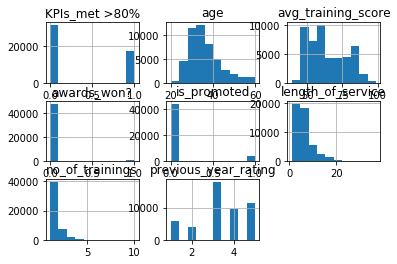

In [146]:
# Learning the distribution of variables
df.hist()

In [369]:
# Getting the Datatypes and number of unique values of each variable
display(train.head())
pd.DataFrame({'Dtype': train.dtypes, 'Unique': train.nunique()})

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


,Dtype,Unique
department,object,9
region,object,34
education,object,4
gender,object,2
recruitment_channel,object,3
no_of_trainings,int64,10
age,int64,41
previous_year_rating,float64,6
length_of_service,int64,35
KPIs_met >80%,int64,2


# Treatment of Null Values

In [158]:
# Checking for null values in Train and Test Datasets
display(print('Train\n', train.isnull().sum())), display(
    print('Test\n', test.isnull().sum()))

Train
 department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


None

Test
 department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


None

(None, None)

In [458]:
# Replacing the null values of 'education' by another category 'Unknown'
train['education'].fillna('Unknown', inplace=True)
test['education'].fillna('Unknown', inplace=True)
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Unknown              2409
Below Secondary       805
Name: education, dtype: int64

In [459]:
#Replacing the null values of 'previous_year_rating' by mean of non-null values of the column
train['previous_year_rating'].fillna(np.mean(train['previous_year_rating'].dropna()),inplace=True)
test['previous_year_rating'].fillna(np.mean(test['previous_year_rating'].dropna()),inplace=True)
test['previous_year_rating'].value_counts()

3.000000    7921
5.000000    5097
4.000000    4249
1.000000    2680
3.339146    1812
2.000000    1731
Name: previous_year_rating, dtype: int64

In [460]:
#Checking for any remaining null values
display(print('Train\n',train.isnull().sum())),display(print('Test\n',test.isnull().sum()))

Train
 employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


None

Test
 employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


None

(None, None)

# Model Selection (Based on Train dataset)

In [315]:
# Seperating Predictor data and Target variable
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

In [371]:
# Importing label encoder
coder = LabelEncoder()

In [266]:
# Label encoding the categorical variables
X['education'] = coder.fit_transform(X['education'])
X['department'] = coder.fit_transform(X['department'])
X['region'] = coder.fit_transform(X['region'])
X['recruitment_channel'] = coder.fit_transform(X['recruitment_channel'])

In [302]:
# Replacing male with 1 and female with 0 by defining a function
def f(series):
    if series == 'f':
        return 0
    else:
        return 1


X['gender'] = X['gender'].apply(f)

In [322]:
# Getting dummy variables to replace categorical variables
X = pd.get_dummies(X)

In [351]:
# new shape of the Predictor data
X.shape

(54808, 58)

In [373]:
# Importing Standard scaler instance
sc = StandardScaler()

In [325]:
# Scaling the Predictor Data
X = sc.fit_transform(X)

In [328]:
# Splitting the data into test and train, with 33% data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [330]:
# Selectning the possible models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier())
]

In [332]:
# Fitting the models and calculating the f1 score, accuracy score and recall score
for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(name, f1_score(y_test, pred), accuracy_score(
        y_test, pred), recall_score(y_test, pred))

Logistic Regression 0.4167450611476952 0.9314424724940565 0.2791430371770636
SVM 0.2434210526315789 0.9237021064853209 0.13988657844990549
Random Forest 0.42241379310344823 0.9333222756676066 0.277882797731569
XGBoost 0.43661282427802256 0.9363631337424669 0.2810333963453056


<font size="3.5">It can be observed that XGBoost algorith have given the best results without any hyperparameter tuning, Thus we'll us an XGBoost based model, and perform **Hyper-parameter tuning** to predict on our test data </font>

# Model Building

In [424]:
# Giving relative coding for different level of education in the 'education' column
def f1(series):
    if series == "Master's & above":
        return 3
    elif series == "Bachelor's":
        return 2
    elif series == "'Below Secondary'":
        return 1
    else:
        return 0

In [463]:
# Applying the function on Train and test data sets
train['education'] = train['education'].apply(f1)
test['education'] = test['education'].apply(f1)

In [427]:
# Encoding the 'gender' column with 1-hot encoding
def f(series):
    if series == 'f':
        return 0
    else:
        return 1

In [462]:
# Applying the encoding
train['gender'] = train['gender'].apply(f)
test['gender'] = test['gender'].apply(f)

In [470]:
# Seperating Predictor data and Target variable
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

In [474]:
# Getting dummy variables for Predictor data and Test dataset
X = pd.get_dummies(X)
test = pd.get_dummies(test)

In [475]:
# Scaling the predictor data and Test
X = sc.fit_transform(X)
test = sc.fit_transform(test)

In [402]:
# Defining the parameter Grid for Optimisation
paramgrid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'reg_alpha': [0, 1, 2, 3],
             'reg_lambda': [1, 2, 3, 4],
             'scale_pos_weight': [1, 2, 3, 4],
             'base_score': [0.5, 1, 1.5, 2]}

In [403]:
# Loading the instance for XGBoost Classifier Algorithm
xgb = XGBClassifier()

In [409]:
# Defining the scoring metric to achieve the minima
f1score = make_scorer(f1_score)

In [410]:
# Calling the Grid Search CV, it iterates 5 times over for every combination to find the best combination of hyper parameters
best_clf = GridSearchCV(estimator=xgb, param_grid=paramgrid,
                        scoring=f1score, n_jobs=-1, cv=5)

In [411]:
# Fitting the data for the best classifier
best_clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_score': [0.5, 1, 1.5, 2],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'reg_alpha': [0, 1, 2, 3],

In [433]:
# Making predictions from the Test dataset
pred = best_clf.predict(test)

# Making Submission

In [438]:
# Making a new test dataframe and adding a prediction column
submit = pd.read_csv(r'...\test_hr.csv')
submit['is_promoted'] = pred

In [443]:
# Saving the data frame as .csv for final submission
submit[['employee_id', 'is_promoted']].to_csv(r'...\solution.csv', index=False)

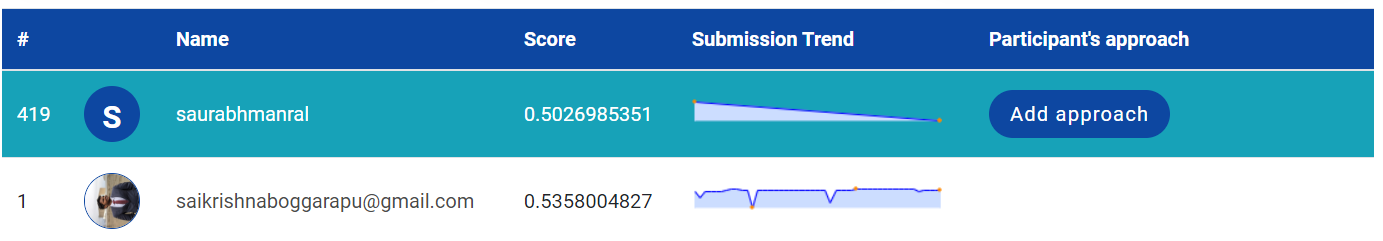

In [3]:
from IPython.display import Image
Image(filename=r'C:\Users\manra\OneDrive\Desktop\vidhya1.png')